# Ensembling and CRPS

[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/ai_weather_to_climate_ats780A8/tree/main/lecture_code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/ai_weather_to_climate_ats780A8/blob/main/lecture_code/ensemble_crps.ipynb)

In [5]:
import properscoring as ps
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Gaussian Example

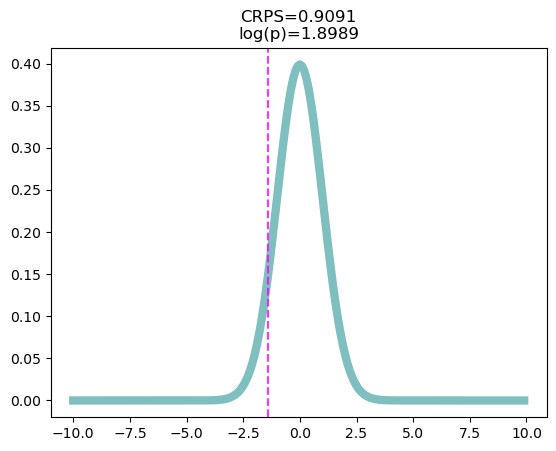

In [47]:
# MODIFY -------------------------
x = np.arange(-10, 10, 0.1)
mu = 0
sigma = 1
truth = -1.4
# --------------------------------

y = stats.norm.pdf(x, loc=mu, scale=sigma)

logp = -np.log(y[np.abs(x - truth).argmin()])
crps = ps.crps_gaussian(truth, mu=mu, sig=sigma)

plt.plot(x, y, linewidth=6, alpha=.5, color="teal")
plt.axvline(x=truth, color='Fuchsia', linestyle='--', alpha=.8)
plt.title(f"CRPS={round(crps, 4)}\nlog(p)={round(logp, 4)}")
plt.show()

## Ensemble

After testing out the code below, try a few examples where the truth is more extreme than any ensemble member.

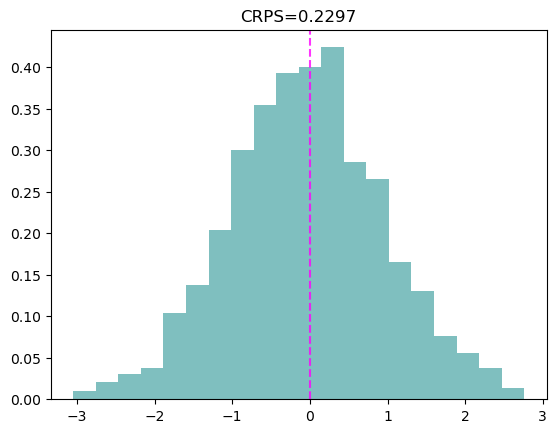

In [52]:
# MODIFY -------------------------
n_ens = 1000
truth = 0

ensemble = np.random.RandomState(0).normal(0, 1, n_ens)
# ensemble = np.random.RandomState(0).uniform(-1, 1, n_ens)
# ensemble = np.random.RandomState(0).lognormal(0, 1, n_ens)
# ensemble = (.4, .2, 3, 6, 8, 10, .2, -.1)
# --------------------------------

crps = ps.crps_ensemble(truth, ensemble)

plt.hist(ensemble, bins=20, density=True, alpha=0.5, color="teal")
plt.axvline(x=truth, color='Fuchsia', linestyle='--', alpha=.8)
plt.title(f"CRPS={round(crps, 4)}")
plt.show()